In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
# caminho do dado
path = 'D:/Users/NKings/Documents/PUC/Mestrado/Base/'

# dado
data = 'data_f3_il_425_426.csv'

# leitura do dado
dfData = pd.read_csv(path + data)

In [3]:
# Cortando o dataframe para apenas uma sessão
dfDataCrop = dfData.drop(dfData.index[439362:878724])

In [4]:
# extraindo apenas a coluna de amplitude do dataframe
col = ['Amplitude', 'domain']
dfAmplitude = pd.DataFrame(dfDataCrop, columns = col)

# exibindo o DF de amplitude
dfAmplitude

Amplitude  domain
0             0.0       4
1             0.0       8
2             0.0      12
3             0.0      16
4             0.0      20
...           ...     ...
439357    -3530.0    1832
439358    -7297.0    1836
439359    -6444.0    1840
439360    -6135.0    1844
439361    -5796.0    1848

[439362 rows x 2 columns]

In [23]:
# transformando a coluna de amplitude em um array
columnAmplitude = np.array(dfAmplitude["Amplitude"].values)

# transformando em uma matriz
matrixAmplitude = columnAmplitude.reshape( (int( columnAmplitude.shape[0]/462), 462))

matrixAmplitudeT = matrixAmplitude.T        

In [6]:
# Transformando a matrizAmplitude em um dataframe
ArrayToDataframe = pd.DataFrame(matrixAmplitude.T)

ArrayToDataframe.shape


(462, 951)

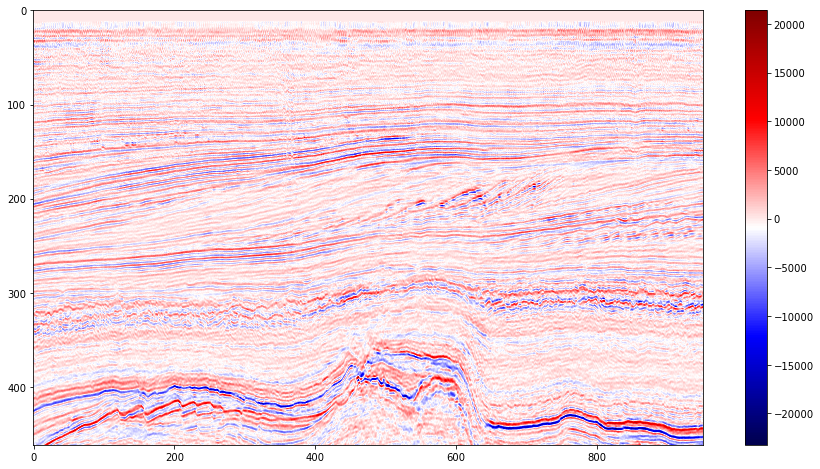

In [24]:
# Plotando o dataframe amplitude
plt.figure(figsize=(15,8))
plt.imshow(matrixAmplitudeT, aspect='auto', cmap='seismic')
plt.colorbar()
plt.show()

In [8]:
# dropando as 27 ultimas linhas
dfDropLines2 = ArrayToDataframe.drop(ArrayToDataframe.index[435:462])

dfDropLines2.shape

(435, 951)

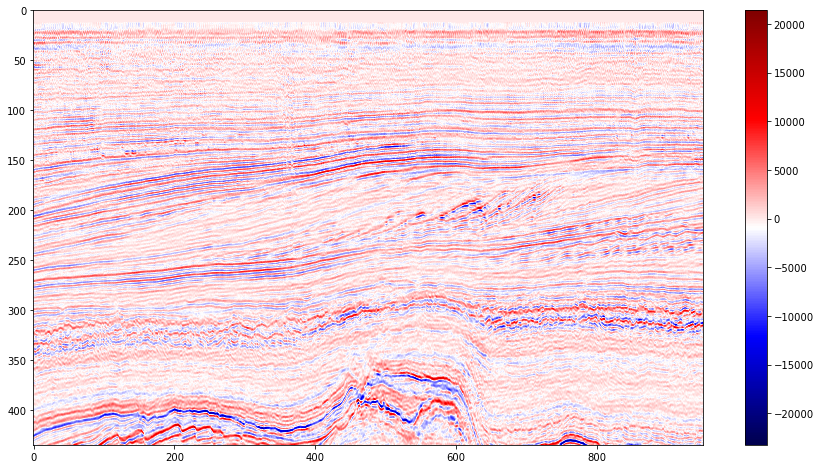

In [9]:
# Plotando a sismica sem as 27 ultimas linhas
plt.figure(figsize=(15,8))
plt.imshow(dfDropLines2, aspect='auto', cmap='seismic')
plt.colorbar()
plt.show()

In [10]:
# dropando as 50 primeiras colunas
dfDropColumns = dfDropLines2.drop(dfDropLines2.iloc[:,0:50], axis = 1)

dfDropColumns.shape

(435, 901)

In [11]:
# dropando as 180 primeiras linhas
dfDropLines = dfDropColumns.drop(dfDropColumns.index[0:180])

dfDropLines.shape

(255, 901)

In [25]:
# Save numpy as npy
# np.save(path + "corte_255_901.npy", dfDropLines)

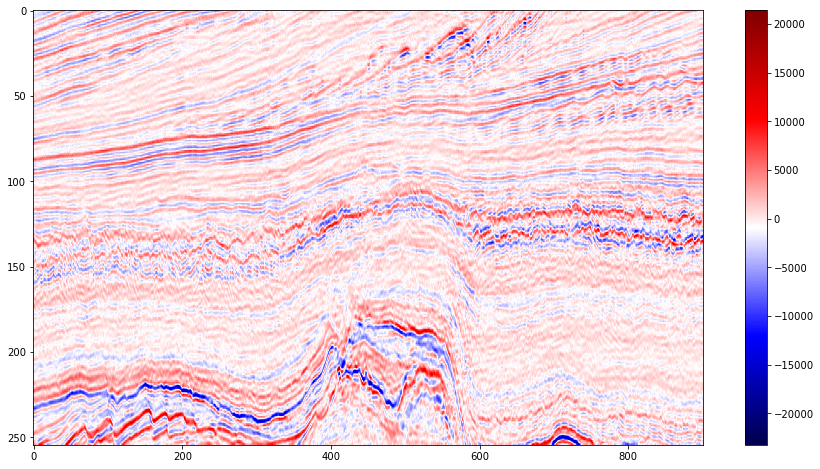

In [12]:
# Plotando a sismica
plt.figure(figsize=(15,8))
plt.imshow(dfDropLines, aspect='auto', cmap='seismic')
plt.colorbar()
plt.show()

# Normalizando os dados

In [13]:
# transformando em um array
arrayAmplitude = np.array(dfDropLines.values)

arrayAmplitude.shape

(255, 901)

In [18]:
# scaler = MinMaxScaler()
# minMax = scaler.fit(dfDropLines)

sc2 = MinMaxScaler(feature_range = (-1, 1))

sc2.fit(dfDropLines)
arrayNorm2 = sc2.transform(dfDropLines)

# arrayNorm

# scalerNor = scaler.transform(data)

# sc.transform([-1, 1])

# minMax

In [37]:
p1, p99 = np.percentile(arrayAmplitude, (1, 99))

fator = max(abs(p1),abs(p99))

seismic2 = arrayAmplitude/fator

seismic2 = np.clip(seismic2, -1, 1)

In [20]:
# ptp = np.max(arrayAmplitude) - np.min(arrayAmplitude)

# normInline = 2.*(arrayAmplitude - np.min(arrayAmplitude))/np.ptp(arrayAmplitude)-1

normInline3 = 2 * ((arrayAmplitude - np.min(arrayAmplitude)) / (np.max(arrayAmplitude) - np.min(arrayAmplitude))) - 1

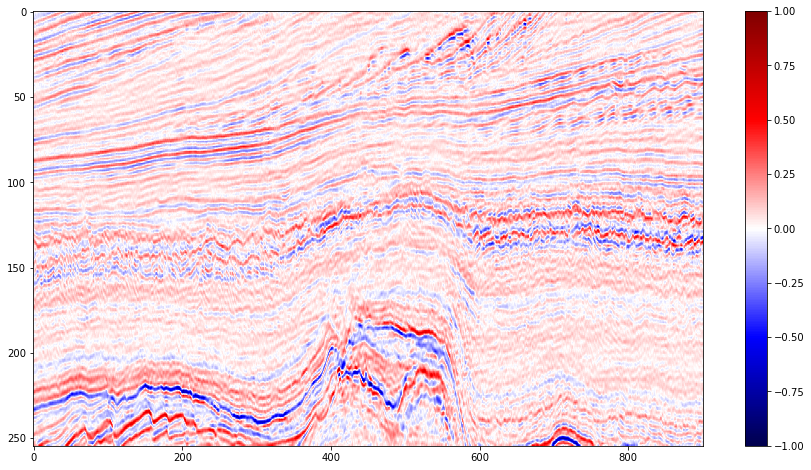

In [21]:
# Plotando a sismica normalizada entre -1 e 1
plt.figure(figsize=(15,8))
plt.imshow(normInline3, aspect='auto', cmap='seismic')
plt.colorbar()
plt.show()

# Dados do artigo

In [27]:
# caminho dos dados do artigo
path_volume = path + "volume/seismic_entire_volume.npy"
path_volume_label = path + "volume/labels_entire_volume.npy"

# carregando os dados
volume_seismic = np.load(path_volume)
volume_seismic_label = np.load(path_volume_label)

# exibindo shape dos dados
print('Volume: ', volume_seismic.shape)
print('Volume labels: ', volume_seismic_label.shape)

Volume:  (601, 901, 255)
Volume labels:  (601, 901, 255)


In [28]:
# obtendo apenas uma inline do volume de dados
inline_vol = volume_seismic[325:326,:,:]
print(inline_vol.shape)

# dando um novo shape para o array inline_vol
inline_vol = inline_vol.reshape(901,255).T
print(inline_vol.shape)

(1, 901, 255)
(255, 901)


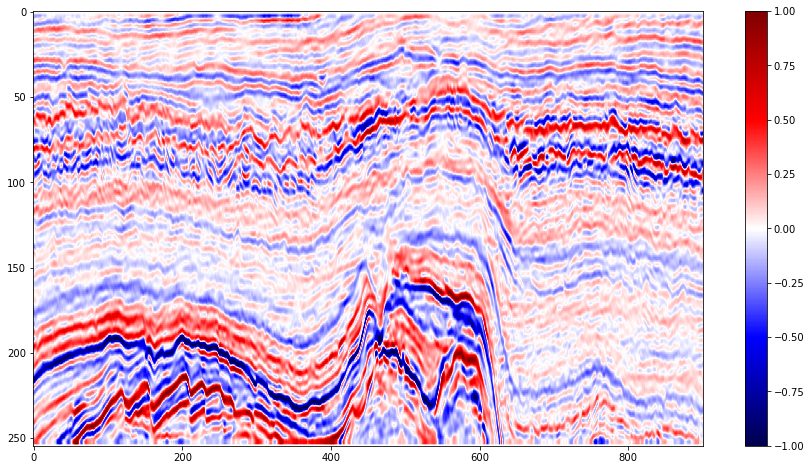

In [29]:
# plotando a inline
plt.figure(figsize=(15,8))
plt.imshow(inline_vol, aspect='auto', cmap='seismic')
plt.colorbar()
plt.show()

In [24]:
# #carregando a base
# volume_seismic = np.load(path + "volume/seismic_entire_volume.npy")
# volume_seismic_label = np.load(path + 'volume/labels_entire_volume.npy')

# # Shape da base de treino e das labels
# # print('Train: ', volume_seismic.shape)
# # print('Train labels: ', volume_seismic_label.shape)

# #inline_train = train_seismic[1:2,:,:]
# inline_vol = volume_seismic[325:326,:,:]
# inline_vol_lab = volume_seismic_label[325:326,:,:]
# print(inline_vol.shape)
# inline_vol = inline_vol.reshape(901,255).T
# inline_vol_lab = inline_vol_lab.reshape(901,255).T
# print(inline_vol.shape)
# #print(inline_train)

# # Real Seismic Data
# plt.figure(figsize=(14,6))
# plt.imshow(inline_vol, aspect='auto', cmap='seismic')
# plt.colorbar()
# plt.show()

# Comparação do Resultado

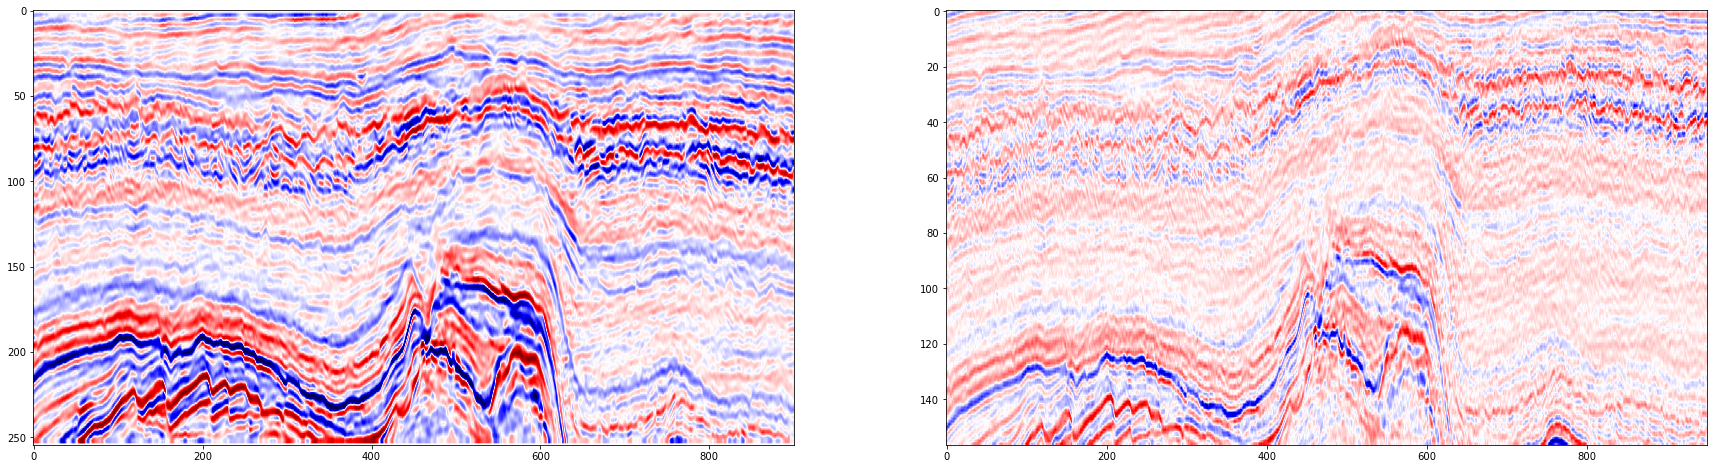

In [19]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.imshow(inline_vol, aspect='auto', cmap='seismic')


plt.subplot(1, 2, 2)
plt.imshow(dfDropLines2, aspect='auto', cmap='seismic')

plt.show()

In [126]:
# seismics = [inline_vol, dfDropLines2]

# fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=False, figsize=(40,8))

# axsList = axs.reshape(1, 2)
# for i in range(2):
#     axsList[0][i].imshow(seismics[i], aspect='auto', cmap='seismic')

# plt.show()

In [20]:
data = 2 * ((dfDropLines2 - np.min(dfDropLines2)) / (np.max(dfDropLines2) - np.min(dfDropLines2))) - 1


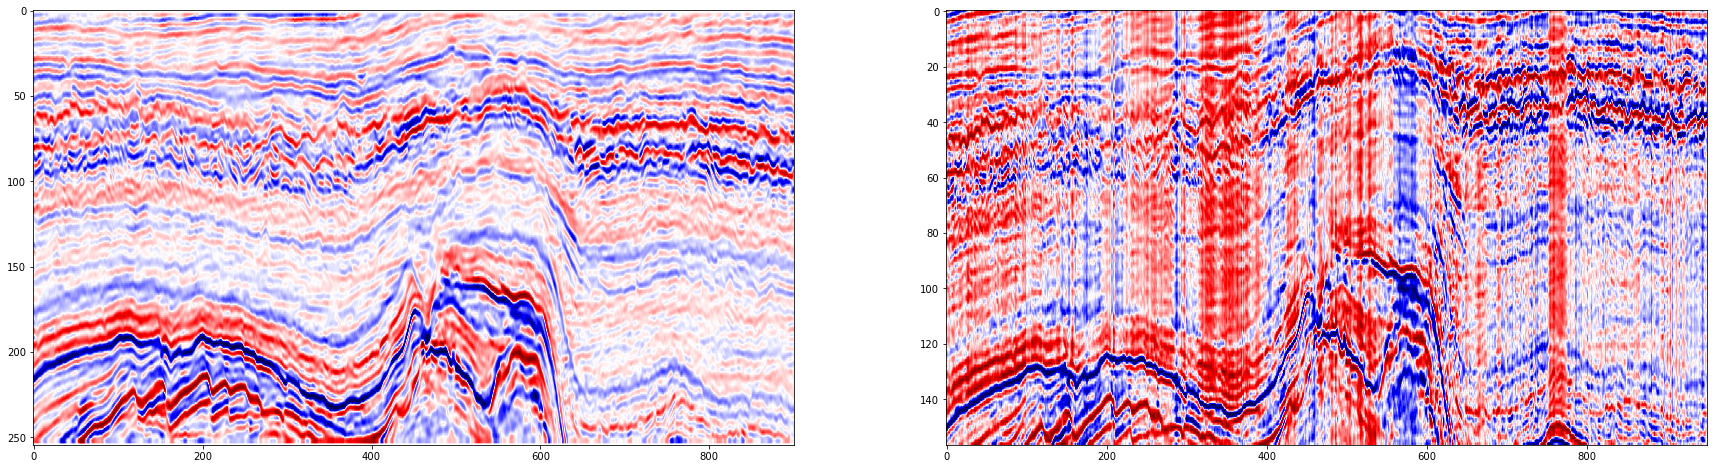

In [21]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.imshow(inline_vol, aspect='auto', cmap='seismic')


plt.subplot(1, 2, 2)
plt.imshow(data, aspect='auto', cmap='seismic')

plt.show()

In [24]:
p1, p99 = np.percentile(dfDropLines2, (1, 99))

fator = max(abs(p1),abs(p99))

seismic = dfDropLines2/fator

seismic = np.clip(seismic, -1, 1)




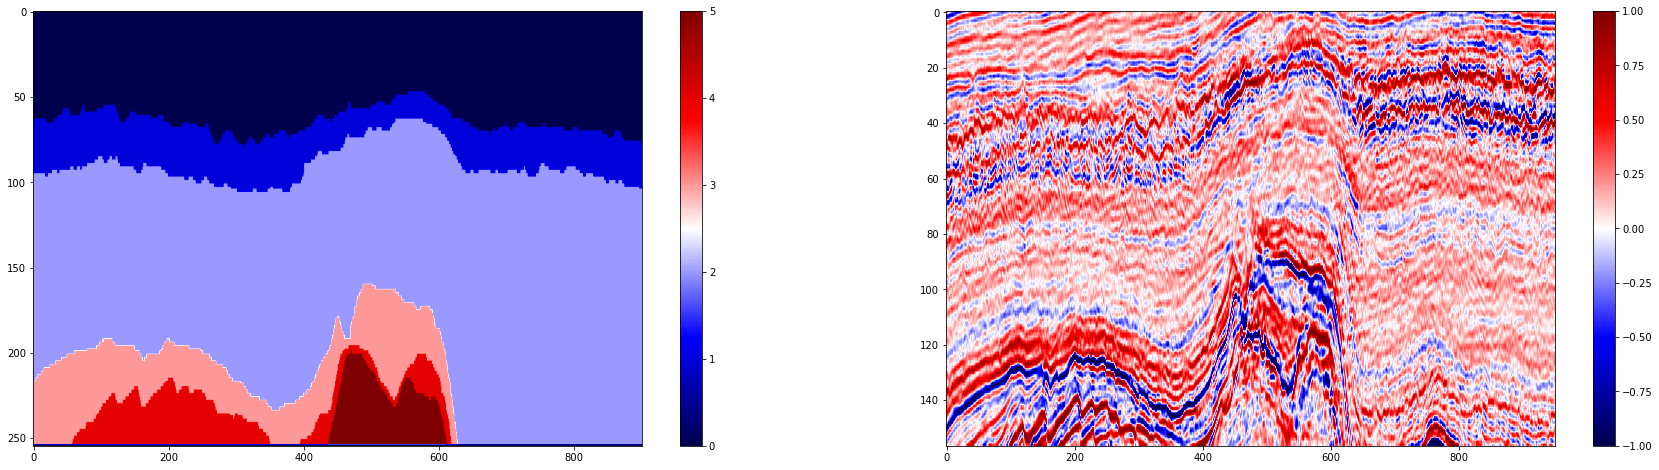

In [36]:
plt.figure(figsize=(30, 8))
plt.subplot(1, 2, 1)
plt.imshow(inline_vol_lab, aspect='auto', cmap='seismic')
plt.colorbar()


plt.subplot(1, 2, 2)
# plt.clim(-1, 1)
plt.imshow(seismic, aspect='auto', cmap='seismic')
plt.colorbar()

plt.show()

In [31]:
seismic.shape

(157, 951)

In [ ]:
# tipo 1
# data = 2 * ((data - linha_min) / (linha_max - linha_min)) - 1

#tipo 2
# Fator = np.amax(np.abs(X)
# X=X/fator

#tipo 3
# p2, p98 = np.percentile(image, (2, 98))
# fator = max(abs(p2),abs(p98))
# x = np.clip(x, -1, 1)



